In [11]:
import tensorflow as tf
import os
import matplotlib.pyplot as plt
import pandas as pd
os.environ['CUDA_VISIBLE_DEVICES'] = '1'
device_name = tf.test.gpu_device_name()
print(device_name)

In [12]:
#Read the total Canadian confirmed data, generating initial
initial=pd.read_csv('C:/Users/yumin/Desktop/RNN confirmed/Italy_confirmed.csv')
pd.DataFrame(initial,columns=range(0,100))
print(type(initial))
initial.columns

<class 'pandas.core.frame.DataFrame'>


Index(['Country/Region', 'Lat', 'Long', '2001/1/21', '2001/2/21', '2001/3/21',
       '2001/4/21', '2001/5/21', '2001/6/21', '2001/7/21',
       ...
       '3/31/21', '2004/1/21', '2004/2/21', '2004/3/21', '2004/4/21',
       '2004/5/21', '2004/6/21', '2004/7/21', '2004/8/21', '2004/9/21'],
      dtype='object', length=102)

In [13]:
#Delete columns unrelated to this code, generating INITIAL_DROPCONLUMS
initial_dropconlums=initial.drop(['Country/Region','Lat','Long'],axis=1)

In [14]:
#Change the INDEX in the INITIAL_DROPCONLUMS table to a number
initial_dropconlums.columns=range(0,initial_dropconlums.shape[1])
print(initial_dropconlums)

        0        1        2        3        4        5        6        7   \
0  2129376  2141201  2155446  2166244  2181619  2201945  2220361  2237890   

        8        9   ...       89       90       91       92       93  \
0  2257866  2276491  ...  3584899  3607083  3629000  3650247  3668264   

        94       95       96       97       98  
0  3678944  3686707  3700393  3717602  3736526  

[1 rows x 99 columns]


In [19]:
#Change the cumulative confirmed data into new data every day and save it into a CSV file
import numpy as np
ay=np.zeros((initial_dropconlums.shape[1],initial_dropconlums.shape[0]))
for a in range(98):
    deffirence=initial_dropconlums[a+1]-initial_dropconlums[a]
    ay[a]=deffirence    

print(ay.shape)
traindata=pd.read_csv('C:/Users/yumin/Desktop/ENEL 645/final/Italy_deffirence.csv',index_col=None,names=range(1,100))
np.savetxt("C:/Users/yumin/Desktop/ENEL 645/final/Italy_deffirence.csv", ay, delimiter=",")
traindata=pd.read_csv('C:/Users/yumin/Desktop/ENEL 645/final/Italy_deffirence.csv',index_col=None)

(99, 1)


In [20]:
print(traindata)
traindata.shape

    1.182500000000000000e+04
0                    14245.0
1                    10798.0
2                    15375.0
3                    20326.0
4                    18416.0
..                       ...
93                    7763.0
94                   13686.0
95                   17209.0
96                   18924.0
97                       0.0

[98 rows x 1 columns]


(98, 1)

In [21]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
class data_preprocessing:
    def __init__(self,train_data,date):
        self.train_data = train_data
        self.date = date
    def train_test_split_data(train_data,date):
        dates=list(date.columns)
        dates1=dates[4:]
        dates=np.array(dates1)
        train_data=train_data.values
        nsplit1 = int(0.6*train_data.shape[0])
        nsplit2 = int(0.8*train_data.shape[0])
        X_train = train_data[:nsplit1]
        X_test = train_data[nsplit1:nsplit2]
        X_valid= train_data[nsplit2:]
        test_start_date=dates[-7]
        print(test_start_date)
        day=[]
        for i in range(0,100):
          day.append(i+1)
        day=np.array(day)
        print(day)
        return X_train,X_test,dates,nsplit1,nsplit2,test_start_date,X_valid
    def traindata_MinMaxScaler():
        X_train,X_test,dates,nsplit1,nsplit2,test_start_date,X_valid= data_preprocessing.train_test_split_data(traindata,initial)
#         train_fit = np.expand_dims(X_train, axis = 1)   
        scaler=MinMaxScaler(feature_range = (0,1))
        training_set_scaled = scaler.fit_transform(X_train)
        test_set_scaled = scaler.fit_transform(X_test)
        valid_set_scaled = scaler.fit_transform(X_valid)
        
        return training_set_scaled,test_set_scaled,scaler,valid_set_scaled
    def create_y_train(self):
#         X_train,X_test,dates,nsplit1,nsplit2,test_start_date= data_preprocessing.train_test_split_data(traindata,initial)
#         train_fit = np.expand_dims(X_train, axis = 1)
#         scaler = MinMaxScaler.fit(train_fit)
        
        training_set_scaled,test_set_scaled,scaler,valid_set_scaled=data_preprocessing.traindata_MinMaxScaler()
#         org_dataframe=training_set_scaled
#         training_set_scaled=scaler.fit_transform(org_dataframe.reshape(-1,1))
#         print(len(training_set_scaled))
        time_steps=10
        x_data=[]
        y_data=[]
        for i in range(time_steps,len(training_set_scaled)):
          x_data.append(training_set_scaled[i-time_steps:i,0])
          y_data.append(training_set_scaled[i,0])
        x_data=np.array(x_data)
        print("x_data_shape",x_data.shape)
        y_data=np.array(y_data)
        print("y_data_shape",y_data.shape)
        x_data=np.reshape(x_data,(x_data.shape[0],x_data.shape[1],1))
        y_data=np.reshape(y_data,(y_data.shape[0],1))
        print('Reshaped x_data shape' , x_data.shape)
        print('Reshaped y_data shape' , y_data.shape)
        print(x_data.shape[1])
        return x_data,y_data
    def create_y_test(self):
        time_steps=10
        x_test=[]
        y_test=[]
        training_set_scaled,test_set_scaled,scaler,valid_set_scaled=data_preprocessing.traindata_MinMaxScaler()
        for i in range(time_steps,len(test_set_scaled)):
          x_test.append(test_set_scaled[i-time_steps:i])
          y_test.append(training_set_scaled[i,0])

        x_test=np.array(x_test)
        y_test=np.array(y_test)
        y_test=np.reshape(y_test,(y_test.shape[0],1))
        return x_test,y_test
    def create_y_valid(self):
        time_steps=10
        x_valid=[]
        y_valid=[]
        training_set_scaled,test_set_scaled,scaler,valid_set_scaled=data_preprocessing.traindata_MinMaxScaler()
        for i in range(time_steps,len(valid_set_scaled)):
          x_valid.append(valid_set_scaled[i-time_steps:i])
          y_valid.append(valid_set_scaled[i,0])

        x_valid=np.array(x_valid)
        y_valid=np.array(y_valid)
        y_valid=np.reshape(y_valid,(y_valid.shape[0],1))
        return x_valid,y_valid



# X_train,X_test,dates,nsplit1,nsplit2,test_start_date= data_preprocessing.train_test_split_data(traindata,initial)
preprocessing=data_preprocessing(traindata,initial)
X_train,X_test,dates,nsplit1,nsplit2,test_start_date,X_valid= data_preprocessing.train_test_split_data(traindata,initial)
# training_set_scaled,test_set_scaled=preprocessing.traindata_MinMaxScaler()
training_set_scaled,test_set_scaled,scaler,valid_set_scaled=data_preprocessing.traindata_MinMaxScaler()
x_data,y_data=preprocessing.create_y_train()
x_test,y_test=preprocessing.create_y_test()
x_valid,y_valid=preprocessing.create_y_valid()
data_preprocessing.train_test_split_data(traindata,initial)
# print(x_data)

2004/3/21
[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100]
2004/3/21
[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100]
2004/3/21
[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  

(array([[14245.],
        [10798.],
        [15375.],
        [20326.],
        [18416.],
        [17529.],
        [19976.],
        [18625.],
        [12530.],
        [14242.],
        [15773.],
        [17243.],
        [16144.],
        [16310.],
        [12544.],
        [ 8825.],
        [10496.],
        [13568.],
        [14055.],
        [13633.],
        [13331.],
        [11628.],
        [ 8559.],
        [10584.],
        [15191.],
        [14360.],
        [13563.],
        [12713.],
        [11249.],
        [ 7925.],
        [ 9651.],
        [13182.],
        [13656.],
        [14213.],
        [13439.],
        [11640.],
        [ 7969.],
        [10612.],
        [12947.],
        [15137.],
        [13893.],
        [13523.],
        [11060.],
        [ 7344.],
        [10368.],
        [12066.],
        [13755.],
        [15470.],
        [14914.],
        [13450.],
        [ 9617.],
        [13299.],
        [16402.],
        [19871.],
        [20488.],
        [1

In [150]:
print(y_data.shape)

(48, 1)


In [22]:
import tensorflow.keras as models
n_hidden_units=20
model = models.Sequential()
model.add(tf.keras.layers.GRU(units=50,return_sequences=True,recurrent_dropout=0.2,input_shape=(x_data.shape[1],1)))
# model.add(tf.keras.layers.Masking(mask_value=1, input_shape=(x_data.shape[1],1)))
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.GRU(units=n_hidden_units,activation='selu',kernel_initializer='orthogonal', recurrent_initializer='orthogonal',
              bias_initializer='zeros',
              bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, recurrent_constraint=None,
              bias_constraint=None, dropout=0.5, recurrent_dropout=0.0, implementation=1, return_sequences=True,#多层时需设置为true
              return_state=False, go_backwards=False, stateful=False, unroll=False),merge_mode='concat'))   #input_shape=(max_lenth, max_features),
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.GRU(units=n_hidden_units,activation='selu',kernel_initializer='orthogonal', recurrent_initializer='orthogonal',
              bias_initializer='zeros',
              bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, recurrent_constraint=None,
              bias_constraint=None, dropout=0.5, recurrent_dropout=0.0, implementation=1, return_sequences=True,
              return_state=False, go_backwards=False, stateful=False, unroll=False),merge_mode='concat'))   #input_shape=(max_lenth, max_features),

# model.add(tf.keras.layers.GRU(512, 
#                              return_sequences=True, 
#                             kernel_initializer='orthogonal', activation='selu'))
# model.add(tf.keras.layers.Dropout(0.5))
# embedding_dim, input_dim=embedding_dim, consume_less='mem', return_sequences=True
# model.add(Attention(keras.layers.wrappers))
# model.add(TimeDistributed(Dense(1, activation='sigmoid')))
model.add(tf.keras.layers.Dense(units=1))
# model.add(BatchNormalization())
# model.add(tf.keras.layers.core.Activation('sigmoid'))
model.compile(optimizer='rmsprop',loss='mean_squared_error',metrics=['mae'])
model.summary()
#  kernel_regularizer=regularizers.l2(0.01),

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru (GRU)                    (None, 10, 50)            7950      
_________________________________________________________________
bidirectional (Bidirectional (None, 10, 40)            8640      
_________________________________________________________________
bidirectional_1 (Bidirection (None, 10, 40)            7440      
_________________________________________________________________
dense (Dense)                (None, 10, 1)             41        
Total params: 24,071
Trainable params: 24,071
Non-trainable params: 0
_________________________________________________________________


Epoch 1/600
5/5 [==============================] - 1s 199ms/step - loss: 0.1941 - mae: 0.3241 - val_loss: 0.0474 - val_mae: 0.1816
Epoch 2/600
5/5 [==============================] - 0s 21ms/step - loss: 0.0634 - mae: 0.1967 - val_loss: 0.0439 - val_mae: 0.1723
Epoch 3/600
5/5 [==============================] - 0s 28ms/step - loss: 0.0653 - mae: 0.2028 - val_loss: 0.0497 - val_mae: 0.1777
Epoch 4/600
5/5 [==============================] - 0s 20ms/step - loss: 0.0695 - mae: 0.2079 - val_loss: 0.0567 - val_mae: 0.2065
Epoch 5/600
5/5 [==============================] - 0s 22ms/step - loss: 0.0666 - mae: 0.2088 - val_loss: 0.0418 - val_mae: 0.1688
Epoch 6/600
5/5 [==============================] - 0s 31ms/step - loss: 0.0601 - mae: 0.1940 - val_loss: 0.0471 - val_mae: 0.1750
Epoch 7/600
5/5 [==============================] - 0s 27ms/step - loss: 0.0688 - mae: 0.2064 - val_loss: 0.0415 - val_mae: 0.1681
Epoch 8/600
5/5 [==============================] - 0s 22ms/step - loss: 0.0650 - mae: 0.1

5/5 [==============================] - 0s 21ms/step - loss: 0.0496 - mae: 0.1720 - val_loss: 0.0388 - val_mae: 0.1601
Epoch 64/600
5/5 [==============================] - 0s 23ms/step - loss: 0.0477 - mae: 0.1731 - val_loss: 0.0499 - val_mae: 0.1789
Epoch 65/600
5/5 [==============================] - 0s 22ms/step - loss: 0.0489 - mae: 0.1764 - val_loss: 0.0453 - val_mae: 0.1729
Epoch 66/600
5/5 [==============================] - 0s 23ms/step - loss: 0.0491 - mae: 0.1695 - val_loss: 0.0393 - val_mae: 0.1634
Epoch 67/600
5/5 [==============================] - 0s 24ms/step - loss: 0.0463 - mae: 0.1657 - val_loss: 0.0403 - val_mae: 0.1638
Epoch 68/600
5/5 [==============================] - 0s 31ms/step - loss: 0.0480 - mae: 0.1670 - val_loss: 0.0448 - val_mae: 0.1777
Epoch 69/600
5/5 [==============================] - 0s 22ms/step - loss: 0.0562 - mae: 0.1865 - val_loss: 0.0386 - val_mae: 0.1602
Epoch 70/600
5/5 [==============================] - 0s 21ms/step - loss: 0.0466 - mae: 0.1654 - 

5/5 [==============================] - 0s 22ms/step - loss: 0.0447 - mae: 0.1711 - val_loss: 0.0538 - val_mae: 0.1712
Epoch 126/600
5/5 [==============================] - 0s 26ms/step - loss: 0.0424 - mae: 0.1633 - val_loss: 0.0418 - val_mae: 0.1553
Epoch 127/600
5/5 [==============================] - 0s 29ms/step - loss: 0.0341 - mae: 0.1494 - val_loss: 0.0377 - val_mae: 0.1561
Epoch 128/600
5/5 [==============================] - 0s 27ms/step - loss: 0.0351 - mae: 0.1511 - val_loss: 0.0715 - val_mae: 0.2012
Epoch 129/600
5/5 [==============================] - 0s 25ms/step - loss: 0.0439 - mae: 0.1654 - val_loss: 0.0631 - val_mae: 0.1865
Epoch 130/600
5/5 [==============================] - 0s 24ms/step - loss: 0.0381 - mae: 0.1469 - val_loss: 0.0387 - val_mae: 0.1589
Epoch 131/600
5/5 [==============================] - 0s 25ms/step - loss: 0.0347 - mae: 0.1462 - val_loss: 0.0398 - val_mae: 0.1572
Epoch 132/600
5/5 [==============================] - 0s 23ms/step - loss: 0.0315 - mae: 0.

5/5 [==============================] - 0s 19ms/step - loss: 0.0178 - mae: 0.1074 - val_loss: 0.1521 - val_mae: 0.2898
Epoch 188/600
5/5 [==============================] - 0s 24ms/step - loss: 0.0246 - mae: 0.1241 - val_loss: 0.1039 - val_mae: 0.2448
Epoch 189/600
5/5 [==============================] - 0s 19ms/step - loss: 0.0251 - mae: 0.1277 - val_loss: 0.1057 - val_mae: 0.2452
Epoch 190/600
5/5 [==============================] - 0s 21ms/step - loss: 0.0202 - mae: 0.1118 - val_loss: 0.1552 - val_mae: 0.2971
Epoch 191/600
5/5 [==============================] - 0s 34ms/step - loss: 0.0249 - mae: 0.1241 - val_loss: 0.0949 - val_mae: 0.2445
Epoch 192/600
5/5 [==============================] - 0s 37ms/step - loss: 0.0152 - mae: 0.0962 - val_loss: 0.1357 - val_mae: 0.2753
Epoch 193/600
5/5 [==============================] - 0s 42ms/step - loss: 0.0166 - mae: 0.1021 - val_loss: 0.1089 - val_mae: 0.2656
Epoch 194/600
5/5 [==============================] - 0s 21ms/step - loss: 0.0292 - mae: 0.

5/5 [==============================] - 0s 20ms/step - loss: 0.0189 - mae: 0.1126 - val_loss: 0.1413 - val_mae: 0.2936
Epoch 250/600
5/5 [==============================] - 0s 22ms/step - loss: 0.0164 - mae: 0.1005 - val_loss: 0.1135 - val_mae: 0.2473
Epoch 251/600
5/5 [==============================] - 0s 20ms/step - loss: 0.0141 - mae: 0.0929 - val_loss: 0.1418 - val_mae: 0.3073
Epoch 252/600
5/5 [==============================] - 0s 19ms/step - loss: 0.0128 - mae: 0.0913 - val_loss: 0.1070 - val_mae: 0.2398
Epoch 253/600
5/5 [==============================] - 0s 19ms/step - loss: 0.0147 - mae: 0.0979 - val_loss: 0.1066 - val_mae: 0.2534
Epoch 254/600
5/5 [==============================] - 0s 19ms/step - loss: 0.0155 - mae: 0.1007 - val_loss: 0.0941 - val_mae: 0.2336
Epoch 255/600
5/5 [==============================] - 0s 19ms/step - loss: 0.0156 - mae: 0.1019 - val_loss: 0.1049 - val_mae: 0.2502
Epoch 256/600
5/5 [==============================] - 0s 27ms/step - loss: 0.0149 - mae: 0.

5/5 [==============================] - 0s 27ms/step - loss: 0.0150 - mae: 0.0993 - val_loss: 0.0942 - val_mae: 0.2394
Epoch 312/600
5/5 [==============================] - 0s 29ms/step - loss: 0.0169 - mae: 0.0967 - val_loss: 0.0959 - val_mae: 0.2363
Epoch 313/600
5/5 [==============================] - 0s 25ms/step - loss: 0.0085 - mae: 0.0740 - val_loss: 0.1158 - val_mae: 0.2628
Epoch 314/600
5/5 [==============================] - 0s 29ms/step - loss: 0.0105 - mae: 0.0808 - val_loss: 0.1328 - val_mae: 0.2907
Epoch 315/600
5/5 [==============================] - 0s 28ms/step - loss: 0.0092 - mae: 0.0784 - val_loss: 0.1021 - val_mae: 0.2468
Epoch 316/600
5/5 [==============================] - 0s 27ms/step - loss: 0.0092 - mae: 0.0773 - val_loss: 0.1067 - val_mae: 0.2640
Epoch 317/600
5/5 [==============================] - 0s 27ms/step - loss: 0.0075 - mae: 0.0693 - val_loss: 0.0909 - val_mae: 0.2286
Epoch 318/600
5/5 [==============================] - 0s 26ms/step - loss: 0.0134 - mae: 0.

5/5 [==============================] - 0s 28ms/step - loss: 0.0104 - mae: 0.0827 - val_loss: 0.0976 - val_mae: 0.2396
Epoch 374/600
5/5 [==============================] - 0s 28ms/step - loss: 0.0072 - mae: 0.0674 - val_loss: 0.1086 - val_mae: 0.2598
Epoch 375/600
5/5 [==============================] - 0s 31ms/step - loss: 0.0070 - mae: 0.0671 - val_loss: 0.1043 - val_mae: 0.2526
Epoch 376/600
5/5 [==============================] - 0s 29ms/step - loss: 0.0080 - mae: 0.0706 - val_loss: 0.1043 - val_mae: 0.2591
Epoch 377/600
5/5 [==============================] - 0s 28ms/step - loss: 0.0110 - mae: 0.0800 - val_loss: 0.1053 - val_mae: 0.2584
Epoch 378/600
5/5 [==============================] - 0s 29ms/step - loss: 0.0079 - mae: 0.0711 - val_loss: 0.0863 - val_mae: 0.2441
Epoch 379/600
5/5 [==============================] - 0s 28ms/step - loss: 0.0107 - mae: 0.0845 - val_loss: 0.0942 - val_mae: 0.2386
Epoch 380/600
5/5 [==============================] - 0s 29ms/step - loss: 0.0078 - mae: 0.

5/5 [==============================] - 0s 29ms/step - loss: 0.0065 - mae: 0.0641 - val_loss: 0.0994 - val_mae: 0.2469
Epoch 436/600
5/5 [==============================] - 0s 30ms/step - loss: 0.0076 - mae: 0.0687 - val_loss: 0.1166 - val_mae: 0.2852
Epoch 437/600
5/5 [==============================] - 0s 30ms/step - loss: 0.0081 - mae: 0.0723 - val_loss: 0.0906 - val_mae: 0.2288
Epoch 438/600
5/5 [==============================] - 0s 29ms/step - loss: 0.0071 - mae: 0.0647 - val_loss: 0.0890 - val_mae: 0.2497
Epoch 439/600
5/5 [==============================] - 0s 33ms/step - loss: 0.0070 - mae: 0.0661 - val_loss: 0.1126 - val_mae: 0.2768
Epoch 440/600
5/5 [==============================] - 0s 33ms/step - loss: 0.0072 - mae: 0.0684 - val_loss: 0.0820 - val_mae: 0.2213
Epoch 441/600
5/5 [==============================] - 0s 27ms/step - loss: 0.0086 - mae: 0.0706 - val_loss: 0.0874 - val_mae: 0.2297
Epoch 442/600
5/5 [==============================] - 0s 27ms/step - loss: 0.0056 - mae: 0.

5/5 [==============================] - 0s 30ms/step - loss: 0.0092 - mae: 0.0758 - val_loss: 0.0989 - val_mae: 0.2380
Epoch 498/600
5/5 [==============================] - 0s 29ms/step - loss: 0.0063 - mae: 0.0602 - val_loss: 0.1095 - val_mae: 0.2681
Epoch 499/600
5/5 [==============================] - 0s 30ms/step - loss: 0.0053 - mae: 0.0576 - val_loss: 0.0968 - val_mae: 0.2405
Epoch 500/600
5/5 [==============================] - 0s 29ms/step - loss: 0.0076 - mae: 0.0703 - val_loss: 0.0773 - val_mae: 0.2093
Epoch 501/600
5/5 [==============================] - 0s 28ms/step - loss: 0.0057 - mae: 0.0607 - val_loss: 0.1007 - val_mae: 0.2495
Epoch 502/600
5/5 [==============================] - 0s 31ms/step - loss: 0.0067 - mae: 0.0669 - val_loss: 0.0940 - val_mae: 0.2333
Epoch 503/600
5/5 [==============================] - 0s 30ms/step - loss: 0.0061 - mae: 0.0633 - val_loss: 0.0736 - val_mae: 0.2080
Epoch 504/600
5/5 [==============================] - 0s 29ms/step - loss: 0.0054 - mae: 0.

5/5 [==============================] - 0s 30ms/step - loss: 0.0065 - mae: 0.0639 - val_loss: 0.0836 - val_mae: 0.2162
Epoch 560/600
5/5 [==============================] - 0s 31ms/step - loss: 0.0050 - mae: 0.0556 - val_loss: 0.0921 - val_mae: 0.2410
Epoch 561/600
5/5 [==============================] - 0s 36ms/step - loss: 0.0061 - mae: 0.0618 - val_loss: 0.0779 - val_mae: 0.2164
Epoch 562/600
5/5 [==============================] - 0s 31ms/step - loss: 0.0053 - mae: 0.0572 - val_loss: 0.1045 - val_mae: 0.2738
Epoch 563/600
5/5 [==============================] - 0s 32ms/step - loss: 0.0062 - mae: 0.0605 - val_loss: 0.1061 - val_mae: 0.2490
Epoch 564/600
5/5 [==============================] - 0s 30ms/step - loss: 0.0046 - mae: 0.0557 - val_loss: 0.0967 - val_mae: 0.2457
Epoch 565/600
5/5 [==============================] - 0s 31ms/step - loss: 0.0054 - mae: 0.0552 - val_loss: 0.0997 - val_mae: 0.2394
Epoch 566/600
5/5 [==============================] - 0s 32ms/step - loss: 0.0051 - mae: 0.

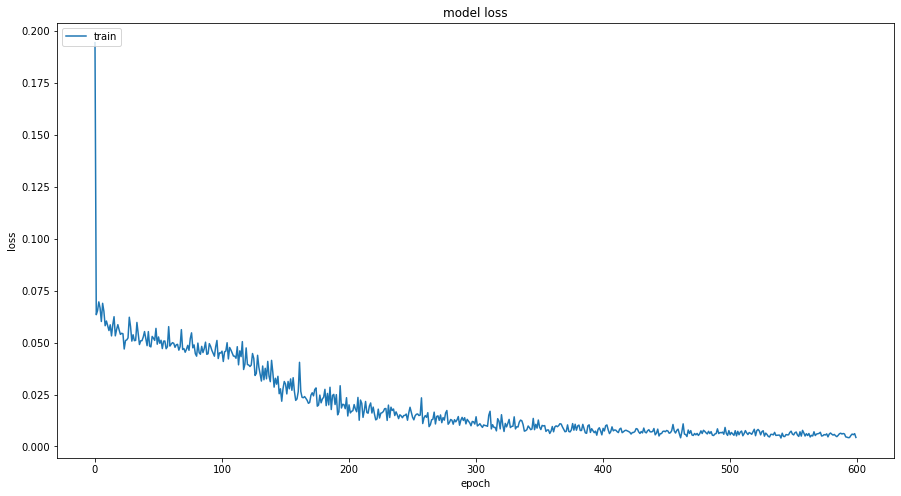

In [23]:

history_rnn=model.fit(x_data,y_data,epochs=600,validation_data =(x_test,y_test),batch_size=10)

history_rnn
loss_history = history_rnn.history["loss"]
# testing_loss_history = history_rnn.history["val_loss"]
plt.figure(figsize=(15, 8))
plt.title('model loss')
plt.plot(history_rnn.history['loss'], label='train')
# plt.plot(history_rnn.history['val_loss'], label='test')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('loss_model_mse.png')
plt.show()

In [24]:
score=model.evaluate(x_valid,y_valid)
print('score is: test_loss %f, mae %f' % (score[0],score[1]))

1/1 [==============================] - 0s 2ms/step - loss: 0.0634 - mae: 0.1560
score is: test_loss 0.063377, mae 0.155973


In [25]:

predicted_covid_19_spread=model.predict(x_valid)
# print(predicted_covid_19_spread)
predict_val=[]
# scaler = MinMaxScaler(feature_range = (0,1))
for i in range(0,predicted_covid_19_spread.shape[0]):
  print(predicted_covid_19_spread[i].mean())
  predict_val.append(predicted_covid_19_spread[i].mean())

predict_val=np.array(predict_val).reshape(-1,1)
predict=scaler.inverse_transform(predict_val)

print("The predicted perday spread from ",test_start_date,"is")
print(predict)



0.84906435
0.84177744
0.72228944
0.5439447
0.46208063
0.58912385
0.6105164
0.69137275
0.72675776
0.69781625
The predicted perday spread from  2004/3/21 is
[[20802.926 ]
 [20624.389 ]
 [17696.814 ]
 [13327.189 ]
 [11321.4375]
 [14434.123 ]
 [14958.263 ]
 [16939.324 ]
 [17806.293 ]
 [17097.195 ]]


In [26]:

y_valid=np.array(y_valid).reshape(-1,1)
actual=scaler.inverse_transform(y_valid)
print(actual)


[[22184.]
 [21917.]
 [21247.]
 [18017.]
 [10680.]
 [ 7763.]
 [13686.]
 [17209.]
 [18924.]
 [    0.]]


MSE = 0.015923978046600843
R-Squared Score = 0.5901372120860923


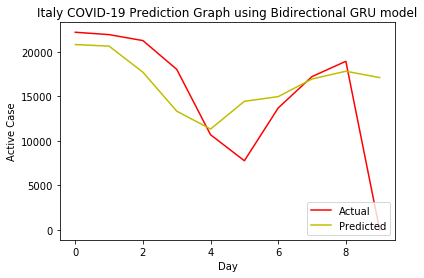

In [28]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from matplotlib.pyplot import *
time_steps=10
def evaluate_model(model,time_steps):
    
    # Prediction Time !!!!
#     predict_val =model.predict(x_valid)
    mse = mean_squared_error(y_valid[:-1],predict_val[:-1])
#     rmse = sqrt(mse)
    r = r2_score(y_valid[:-1],predict_val[:-1])
    return mse,r, y_valid, predict
mse,r2_score,true,predicted = evaluate_model(model,time_steps)
print('MSE = {}'.format(mse))
print('R-Squared Score = {}'.format(r2_score))



def plot_data(actual,predict):
    plt.plot(actual,c = 'r')
    plt.plot(predict,c = 'y')
    plt.xlabel('Day')
    plt.ylabel('Active Case')
    plt.title('Italy COVID-19 Prediction Graph using Bidirectional GRU model')
    plt.legend(['Actual','Predicted'],loc = 'lower right')
    plt.show()
plot_data(actual,predict)